In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
from matplotlib.patches import Patch
import cdsapi

In [2]:
NPS = ccrs.NorthPolarStereo(central_longitude=15)
PC = ccrs.PlateCarree()

In [75]:
def create_map_basis(ax):
    ax.set_extent([-64, -48, 50, 62], crs=ccrs.PlateCarree())
    gl = ax.gridlines(crs=PC, zorder=6, draw_labels=True, x_inline = False,
                      y_inline = False, linewidth=0.5, linestyle=(0, (5, 1)))
    #gl.n_steps = 60
    gl.ylocator = mticker.FixedLocator(np.arange(50,66, 2))
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator(np.arange(-64, -46, 2))
    gl.xformatter = LONGITUDE_FORMATTER
    
    #gl.ylabel_style = {'fontsize': 10, 'zorder': 6, 'rotation':0, 'color': 'k'}
    #gl.xlabel_style = {'fontsize': 10, 'zorder': 6, 'rotation':0, 'color': 'k'}
    gl.top_labels = False
    gl.right_labels = False

In [63]:
def make_map_elements(ax,add=True):
    # define the coastlines, oceans and land shapes
    coasts_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', 
                                              edgecolor='black',
                                              facecolor= 'none')
    
    ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face',
                                            facecolor='lightblue')
    
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='lightgray')
    
    # add all to the map
    if add:
        ax.add_feature(ocean_50m, zorder = 1, alpha = 0.4)
        # ax.add_feature(max_ice, zorder = 3, linewidth = 0.5)
        # ax.add_feature(min_ice, zorder = 2, linewidth = 0.5)
        ax.add_feature(land_50m, zorder = 4, alpha = 0.4)
        ax.add_feature(coasts_50m, zorder = 5, linewidth = 0.5)

In [26]:
def plot_flight_track(flight_id,ax,**kwargs):
    flight_data = xr.open_dataset(
                    glob('/badc/faam/data/2022/'+
                         flight_id+'*/core_processed/core_faam*'
                         +flight_id+'.nc')[-1], decode_times=False, engine='netcdf4')  
    
    ax.plot(flight_data.LON_GIN[:,0], flight_data.LAT_GIN[:,0],
        #transform = PC,
            **kwargs)
    return
    

## Instructions for Mark
To change the colours, choose a colour name from [this link](https://matplotlib.org/3.5.0/gallery/color/named_colors.html), or use a hex code in RGB.
Linestyles are '-' for solid, '--' for dashed and ':' for dotted.
Labels with underscores at the beginning won't be displayed. I've left them present to make it easier to see where the labels go if you want to adjust them.
Linewidth - bigger numbers, bigger lines (unsurprisingly).
Don't touch anything else!

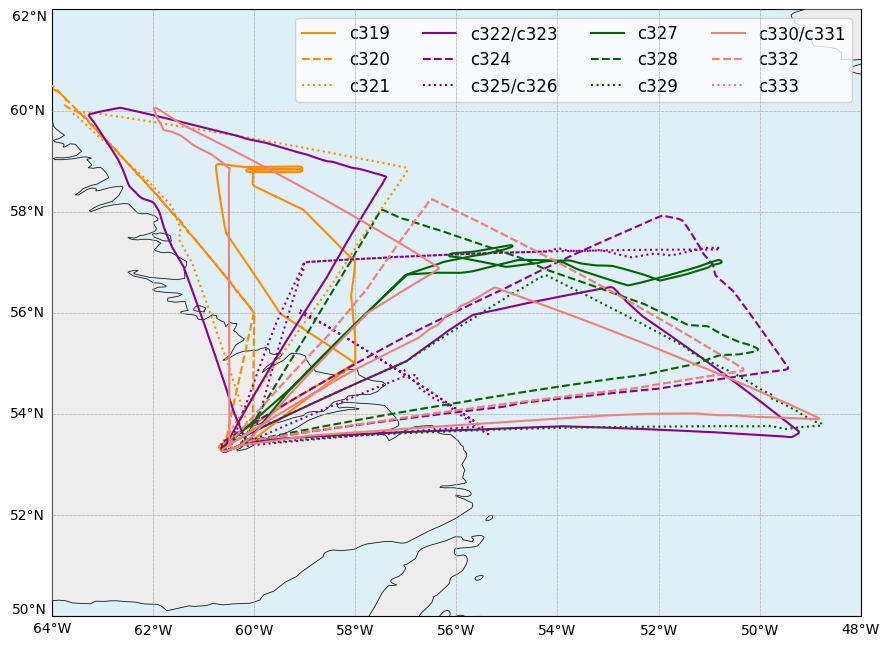

In [79]:
fig, ax = plt.subplots( figsize=(9,9), dpi=100, subplot_kw=dict(projection=PC))
create_map_basis(ax)
make_map_elements(ax)

# Plot flight tracks, only labelling the second of each double-flight.
# Deliberately manual for tuning of colour scheme.
# Single flights
plot_flight_track('c319',ax,linewidth = 1.5, linestyle='-',
                  color='darkorange', zorder = 7, label='c319')
plot_flight_track('c320',ax,linewidth = 1.5, linestyle='--',
                  color='darkorange', zorder = 8, label='c320')
plot_flight_track('c321',ax,linewidth = 1.5, linestyle=':',
                  color='darkorange', zorder = 9, label='c321')
# DOUBLE FLIGHT
plot_flight_track('c322',ax,linewidth = 1.5, linestyle='-',
                  color='darkmagenta', zorder = 10, label='_c322')
plot_flight_track('c323',ax,linewidth = 1.5, linestyle='-',
                  color='darkmagenta', zorder = 10, label='c322/c323')
# Single flight
plot_flight_track('c324',ax,linewidth = 1.5, linestyle='--',
                  color='darkmagenta', zorder = 11, label='c324')
# DOUBLE FLIGHT
plot_flight_track('c325',ax,linewidth = 1.5, linestyle=':',
                   color='darkmagenta', zorder = 12, label='_c325')
plot_flight_track('c326',ax,linewidth = 1.5, linestyle=':',
                  color='darkmagenta', zorder = 12, label='c325/c326')

# Single flights
plot_flight_track('c327',ax,linewidth = 1.5, linestyle='-',
                   color='darkgreen', zorder = 13, label='c327')
plot_flight_track('c328',ax,linewidth = 1.5, linestyle='--',
                   color='darkgreen', zorder = 14, label='c328')
plot_flight_track('c329',ax,linewidth = 1.5, linestyle=':',
                   color='darkgreen', zorder = 15, label='c329')

# DOUBLE FLIGHT
plot_flight_track('c330',ax,linewidth = 1.5, linestyle='-',
                   color='lightcoral', zorder = 16, label='_c330')
plot_flight_track('c331',ax,linewidth = 1.5, linestyle='-',
                   color='lightcoral', zorder = 16, label='c330/c331')

# Single flights
plot_flight_track('c332',ax,linewidth = 1.5, linestyle='--',
                   color='lightcoral', zorder = 17, label='c332')
plot_flight_track('c332',ax,linewidth = 1.5, linestyle=':',
                   color='lightcoral', zorder = 18, label='c333')

ax.legend(ncol=4, fontsize=12)

# Manual additions of outside labels
ax.text(-64.1, 62, '62\u00B0N', transform=PC, va='top', ha='right')
ax.text(-64.1, 50, '50\u00B0N', transform=PC, va='bottom', ha='right')
ax.text(-48, 49.87, '48\u00B0W', transform=PC, va='top', ha='center') # lower due to bug
ax.text(-64, 49.9, '64\u00B0W', transform=PC, va='top', ha='center')

fig.tight_layout()
# UNCOMMENT TO SAVE IN WHICHEVER FORMAT
# fig.savefig('./imgs/mphase_flight_tracks.eps')
# fig.savefig('./imgs/mphase_flight_tracks.png')
# fig.savefig('./imgs/mphase_flight_tracks.pdf')